#**Projeto end-to-end League of Legends - Prevendo o resultado de partidas de League of Legends**



Esse é um projeto definido como end-to-end, ou melhor, um projeto de ponta a ponta, e essa é uma das melhores formas de colocar em prática os ensinamentos aprendidos dento da ciência de dados. 

O objetivo desse projeto é que seja possivel de prever partidas de league of legends na seleção de campeos, antes mesmo de iniciar uma partida, e que de alguma forma o jogador possa usar esse projeto antes de iniciar uma partida, para saber as suas chances de vitória. Como ideia inicial, isso poderá ser feito através da biblioteca Streamlit, onde o usuario irá escolher as variavies de entrada do modelo, de acordo com a seleção de campeõs da sua partida, e obter o resultado da váriavel de saída, sendo vitória ou derrota.

---



Agora, *deixa eu me apresentar, que eu acabei de chegar, depois que ler esse projeto, você vai lembrar meu nome* (brincadeiras a parte), me chamo Luis Vinicius, também conhecido como Tito, e tenhos 20 anos. 

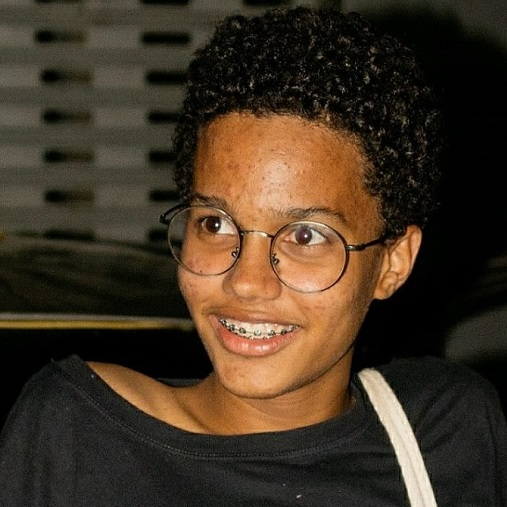



---



Dessa forma, as etapas que neste projeto seram construídas, com o objetivo de não só construir uma solução, porém também aprender mais sobre os tópicos que serão vistos, são elas:

### **Etapas do projeto**

* Entendimento do Problema

* Coleta do dados 
   1. Kaggle (Jogos classificados de diamantes de League of Legends)
   2. Entendimento do contexto dos dados

* Manipulação e preparação dos dados
    1. Deletar colunas
    2. Renomear colunas 
    3. Verificar os tipos das colunas
    4. Alterar os tipos de colunas 
    5. Verificar dados ausentes
    6. Preencher dados ausentes
    7. Corrigindo dados duplicados
    8. Outliers
    9. Verificar se existem dados desbalenceados
  
* Exploração e visualização dos dados
1.   Teste de Hipoteses 


* Modelagem e Avaliação de Modelos (Aplicar o melhor modelo para o problema e avalia-lo)

1.   Seleção de Variaveis
2.   Feature Eng
3.   AutoML
4.   Escolha do Algoritmo
5.   Metricas de avaliação para regressão ou classificação (Dependendo do Algoritmo escolhido)

* Deploy (Verificar aula salva no drive do MinerandoDados)



## **Entendimento do Problema**

##**Coleta dos Dados**

Os dados foram coletados a partir da plataforma Kaggle, que trata-se de uma comunidade de Data Science e Machine Learning, onde além de ser possivel de participar de competições da área, é possivel encontrar dados e projetos de outros usuarios...

O conjunto de dados pode ser encontrado aqui: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

###**Contexto dos dados** 


Este conjunto de dados contém os primeiros 10 minutos. estatísticas de aprox. 10k jogos classificados (SOLO QUEUE) de um alto ELO (DIAMOND I a MASTER). Os jogadores têm praticamente o mesmo nível.

Cada jogo é único. O gameId pode ajudá-lo a buscar mais atributos da API Riot.

Há 19 recursos por equipe (38 no total) coletados após 10 minutos de jogo. Isso inclui mortes, mortes, ouro, experiência, nível ... Depende de você fazer alguma engenharia de recursos para obter mais insights.

A coluna blueWins é o valor alvo (o valor que estamos tentando prever). Um valor de 1 significa que o time azul venceu. 0 caso contrário.

Até agora eu sei, não há valor faltando.

####Dicionario dos dados

* Totem de proteção: Um item que um jogador pode colocar no mapa para revelar a área próxima. Muito útil para controle de mapa / objetivos.

* Minions: NPC que pertencem a ambas as equipes. Eles dão ouro quando mortos por jogadores.

* Asseclas da selva: NPCs que NÃO pertencem a nenhuma equipe. Eles dão ouro e buffs quando mortos por jogadores.

* Monstros de elite: Monstros com alto HP / dano que dão um bônus massivo (ouro / XP / estatísticas) quando mortos por uma equipe.

* Dragões: Monstro de elite que dá bônus de equipe quando morto. O quarto dragão morto por uma equipe dá um bônus de estatísticas massivo. O quinto dragão (Dragão Ancião) oferece uma grande vantagem para a equipe.

* Herald: Monstro de elite que dá bônus de estatísticas quando morto pelo jogador. Isso ajuda a empurrar uma pista e destrói estruturas.

* Torres: estruturas que você deve destruir para alcançar o Nexus inimigo. Eles dão ouro.

* Nível: nível de campeão. Comece em 1. O máximo é 18.

##**Configurações iniciais**

Para iniciar o projeto, algumas bibliotecas são essenciais, como a biblioteca Pandas, uma das principais, tendo em vista a necessidade de manipular e analisar os dados

In [ ]:
#importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Configurar o notebook
sns.set_style('whitegrid');

#Alterando estilo do matplolib
plt.style.use('ggplot')

### **Leitura do arquivo**

Antes de tudo, deve ser feita uma leitura do arquivo que será utilizado, retirando algumas informações básicas, como: "Como os dados estão separados?", "Qual o tamanho do arquivo", "Quantos registros possuem?", "Vai demorar para o Google colab ler o arquivo?". Essas perguntas são importantes para quando necessario importar o conjunto de dados com o Pandas.

Abrindo o arquivo, obviamente, foi possivel identificar que se trata de um arquivo no formato CSV, os dados estão separados por "," e o conjunto possue 9879 linhas, ou seja, se trata de um conjunto de dados de tamanho pequeno, comparado ao mundo real, porém para esse projeto já é um pouco grande e talvez seja necessario trabalharmos com uma amostra do conjunto dos dados.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/luislauriano/Data_Science/master/Prevendo%20Partidas%20de%20League%20of%20Legends/high_diamond_ranked_10min.csv')

Em alguns casos reais, onde é trabalhado com conjuntos de dados maiores e conseguentemente mais pesados, essa etapa de importar os dados pode ser mais trabalhosa, por exigir outros parametros, como header, skiprows, skipfooter, delimiter e entre outros, para que a importação do conjunto de dados ocorra.

Como antes mesmo de importar o conjunto de dados, foi feita uma leitura, eu sei que o conjunto de dados possue 9879 linhas, porém, será que a leitura dos dados foi corretamente? Então o primeiro entendimento dos dados será quantas linhas e colunas o conjunto de dados possue.

In [6]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {df.shape[0]}')
print(f'Número de entradas ou colunas {df.shape[1]}')

Número de linhas ou variaveis 9879
Número de entradas ou colunas 40


Se observado, a leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 9879 linhas ou variaveis e 40 entradas ou colunas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as proximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.

##**Manipulação e Preparação dos dados**

A etapa de pre-processamento dos dados ou limpeza e preparação dos dados é uma das mais importantes de todo projeto de Data Science ou Machine Learning. Nessa etapa, os dados precisam ser manipulados e tratados, sendo a biblioteca Pandas a principal por desempenhar esse papel. A etapa se dá de forma continua, podendo acontecer durante todo o projeto e não apenas em sua fase especifica, também é a etapa que mais demanda tempo do cientista ou analista de dados, "será que a demanda maior de tempo seja por se tratar da mais importante?". O pre-processamento de dados envolve muito tratamento dos dados e nem tudo será visto nesse projeto. 


A limpeza e manipulação dos dados nesse projeto pode parecer algo muito simples e que inicialmente não tem significado, porém, nos casos reais os dados dificilmente virão tratados, limpos e organizados. Por isso, tanto se fala que essa etapa é a etapa que mais se demanda tempo. Sendo a responsável por fazer uma amostra limpa dos dados, para que assim os dados possam ser utilizados em etapas futuras, como na analise exploratoria dos dados, onde os dados precisam estar limpos e organizados para ganharem significados.

### **Deletando colunas**

In [ ]:
#As colunas que pertencem ao conjunto de dados
df.columns

Index(['album', 'album_type', 'track_number', 'id_track', 'name', 'popularity',
       'explicit', 'duration_ms', 'release_date', 'artists'],
      dtype='object')

###**Verificar se existem dados desbalenceados**

Verificar se a variavel target possivel valores desbalanceados (colocar textos que estao salvos no github da aula da codenation sobre isso, aula de regressao ou classificacao)

## **Exploração e Visualização de dados**

Segundo o esatístico John Tukey, a etapa de exploração de dados ou EDA pode ser definida como: 

*Procedimentos para analisar dados, técnicas para interpretar os resultados de tais procedimentos, formas de planejar a reunião dos dados para tornar sua análise mais fácil, mais precisa ou mais exata e toda a maquinaria e os resultados da estatística (matemática) que se aplicam a análise de dados.*






A exploração de dados ou EDA pode ser considerada uma das fases mais importantes de todo processo de análise de dados. A partir dela começamos a entender mais sobre os dados que envolve a problematica e conseguentemente construir hipoteses e perguntas. Nessa fase, para ajudar no trabalho de entendimento e exploração dos dados é feito o uso de ferramentas estatísticas e de visualização de dados, para que as informações a respeito dos dados sejam a mais clara possivel. Não deve ser levado em consideração um conjunto de regras e passo a passo na hora de construir a análise exploratoria de dados, pelo contrario, a análise exploratória de dados não se trata de um processo formal e sim um estado de espirito investigativo. Na EDA o mais importante é investigar todas as ideias que ocorrerem, conforme o entendimento e significado dos dados vai aumentando.

Pode-se dizer que a EDA é um ciclo iterativo e ciclico, onde:

* É preciso gerar questões relevantes para o negócio, logo, é essencial que em casos reais exista uma conversa com o pessoal da aréa de negocio, a respeito dos dados e oque o pessoal da área de negocio está buscando responder através do conjunto de dados.

* Para encontrar as respostas dos questionamentos levantados é preciso gerar gráficos, manipulação e estatística sobre os dados.

* Refinar os questioanamentos e utiliza-los para gerar novos questionamentos pertinentes. 

Um fator essencial que muita das vezes é negligenciado por quem está começando na área dos dados é a estatistica. A estatística tanto univariada como multivariada é de suma importância para os dados ganharem ainda mais significado, durante a exploração de dados.



---



**Visualização de dados**

Após os dados serem transformados em informação na análise exploratória de dados, a informação ainda precisa se tornar útil para outras pessoas e conseguentemente pode ser utilizada, logo, a visualização de dados tem a responsabilidade de tornar a informação útil e de fácil entendimento, para que outras pessoas possam usar a informação. 
A etapa de visualizacao de dados está dentro da exploração de dados, com o objetivo de transmitir a informação retiradas dos dados e trata-se de uma das etapas mais importantes da análise exploratória. 

A visualização de dados pode ser definida dentro da ciência de dados como, "A formação de imagens visuais mentais para transmitir informações através de
representações gráficas de dados". De acordo com o Edward Tufte que é pioneiro no campo do desenvolvimento de visualizações efetivas e escreveu vários livros sobre o assunto, uma boa visualização de dados precisa seguir três regras: 

* Integridade gráfica
* Maximizar a proporção de dados e tinta
* Evitar lixo gráfico.

A integridade gráfica está relacionada a parte obscura da visualização de dados, onde não devemos através da visualização de dados e estatística buscar
enganar ou trapacear quem está visualizando o gráfico.

Para a regra de maximizar a proporção de dados e tintas deve ser levado em conta que quanto mais simples e claro um gráfico for, melhor, o famoso "menos é mais". Um dos problemas principais que envolvem a regra de maximização são os famosos gráficos de pizza e 3D. O principal problema de um gráfico de pizza e 3D são suas análises ser de difícil entendimento, tendo em vista, que não somos bons em fazer comparações de área.

A terceira regra de evitar lixo gráfico se trata de evitar elementos visuais estranhos ou que não tenham nenhum objetivo e que possam acabar distraindo quem está visualizando o gráfico, por mais que pareça algo simples, é essencial.



Agora de fato, e finalmente, vamos começar a explorar e construir visualizações de dados

In [ ]:
#Começar a partir daqui a construir a exploração e visualização de dados

**Distribuições dos dados**

construir distribuições dos dados (ex d projto waves)

###**Testes de Hipotese**

Fazer uma análise exploratória de dados sempre deve ser levado como objetivo gerar **Perguntas** e **Hipoteses**. Logo, irei definir algumas perguntas e hipoteses que tenho inicialmente e responder durante a análise exploratoria de dados, para reter uma informação inicial dos dados. Como já dito anteriormente, durante a análise exploratoria de dados surgem mais perguntas, conforme os dados vão ganhando significado e o entendimento a respeito dos dados vai aumentando. Então, é sempre bom começar com perguntas simples e ir aumentando suas complexidades conforme se vai conhecendo os dados, o que também é um dos objetivos da análise exploratória de dados, você tomar conhecimento dos seus dados. Vale lembrar que quando se lida com um novo conjunto de dados, nem sempre tem informações disponiveis sobre os dados, sendo necessario buscar o conhecimento de uma pessoa especialista no assunto, conversar com estas pessoas influenciará e ajudará em perguntas futuras, tendo em vista que não é possivel gerar perguntas sem entender a problematica que envolve os dados e o meio que os dados estão envolvidos, muito menos sem entender o conjunto de dados em si. Nos casos reais, em sua maioria das vezes o pessoal da área de negocios que tem um maior entendimento da problematica e área que envolve os dados, além do conjunto de dados, por isso são os principais responvaveis por gerarem as perguntas que se deseja responder na análise exploratoria de dados.

MOSTRAR EXEMPLO DOS TESTES DE HIPOTESES COMO O SHAPIIRO WILK

A análise exploratoria deve se chegar ao fim quando for identificado que já se atingiu o objetivo desejado e os questionamentos principais já foram respondidos, sendo em casos reais responsabilidade do pessoal da área de negócios, que são os responsáveis por fazerem os questionamentos a respeito dos dados, além de na maioria das vezes terem um entendimento maior sobre os dados e a área que os mesmo estão envolvidos.

##**Modelagem e Avaliação de Modelos**

A primeira é pergunta que deve ficar clara é se estamos falando de um problema de classificação ou regressão? Isso, sem dúvidas irá ajudar na busca por um bom algoritmo... Neste caso, trata-se de um problema de classificação..

###**Seleção de Variaveis**

Utilizar a biblioteca Yellow, usada para selecionar variaveis (vista no desafio de selecao de variaveis)

Aqui definiremos qual modelo será usado em nosso projeto, ou seja, qual o que se aplica melhor ao nosso problema.

###**Feature Eng**

###**AutoML**

Estudar sobre Pycaret Classification, pycaret aplicado a problemas de classificação.. https://pycaret.org/classification/   e https://towardsdatascience.com/classification-with-pycaret-a-better-machine-learning-library-cff07a10a28c

A biblioteca em questão traz a abordagem AutoML, que é o processo de automatizar o processo de aplicação do aprendizado de máquina a problemas do mundo real. O AutoML cobre o pipeline completo do conjunto de dados bruto ao modelo de aprendizado de máquina. O AutoML foi proposto como uma solução baseada em inteligência artificial para o desafio cada vez maior de aplicar o aprendizado de máquina.

A principal vantagem de usar essa abordagem aqui é que PyCaret pode treinar e testar 20 tipos diferentes de modelos de classificação. Como a função a ser mapeada que relaciona o conjunto de dados à variável a ser estimada possui complexidade relativamente baixa, é muito provável que um desses modelos tenha um desempenho muito bom em nosso caso. (colocar referencia de wesley)



Dessa forma podemos observar quais algoritmos obtiveram melhores desempenhos...

###**Modelagem**

Testando outros modelos... (verificar notebooks que estão no kaggle desse dataset)

###**Avaliação**

##Referencias

https://github.com/w-alves/end-to-end-data-science/blob/main/%5BPT-BR%5D%20end-to-end-data-science-project.ipynb

https://www.kaggle.com/allanbruno/predicting-wins-based-on-early-game-75-accuracy

https://ojs.aaai.org/index.php/AIIDE/article/view/7449/7348
https://github.com/csci-599-applied-ml-for-games/league-of-legends-bot

https://youtu.be/5B2xIyKOnzc

**Criar deep learning do lol com base no artigo e projeto**

tps://dev.to/allands/how-machine-learning-made-me-win-more-on-league-of-legends-3on5)
